# 循环神经网络RNN

是对之前说讲的线性层的一种复用
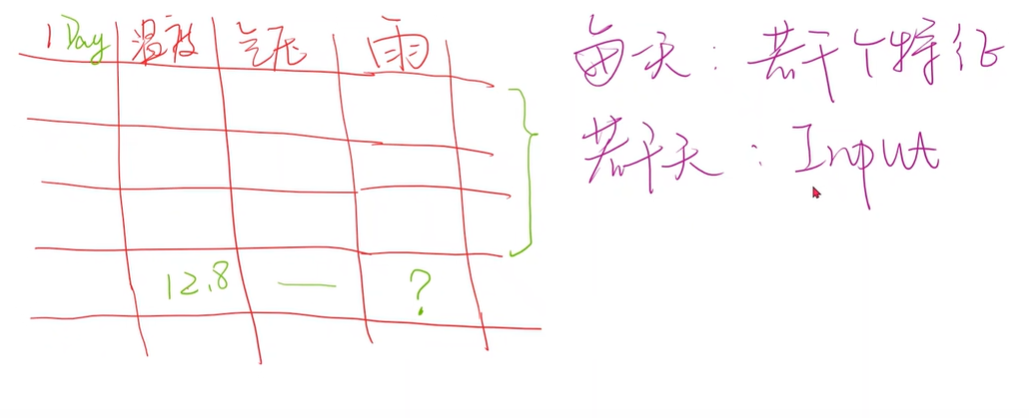
每天有若干天的特征，而需要前面若干天的数据来作为相应的输入
用卷积层和全连接层区别
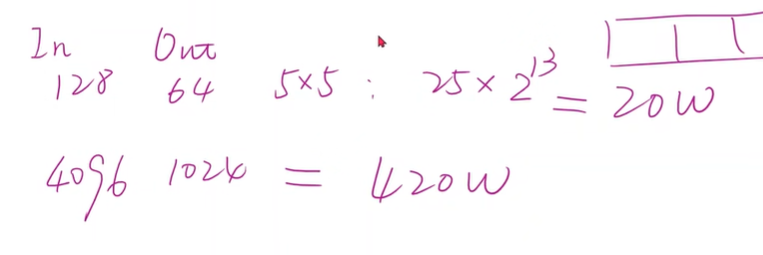
x2的数据会依赖于x1 x3的数据会依赖于x2 且数据之前有先后链接顺序
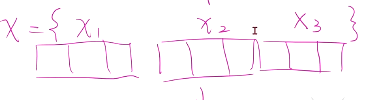
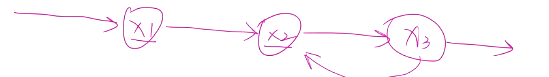
rnn解决的数据序列的情况

rnn解决的方式 用权重共享的思路 来减少权重的数量

例如 天气数据 股市数据 自然语言顺序 RNN网络主要面向的也是自然语言数据处理的情况

# 什么叫做RNN

1.RNN cell本质就是一个线性层 可以将某一个维度映射到另一个维度 这个线性层是共享

每一个x1都送到RNNcell中去得到h1 而h1也会被送到下一个RNNcell中去 再输入x2的信息包括前面x1的信息和h1的信息

h0作为输入 先验知识 若想用图像来生成文字


RNN cell的本质就是全连接层，只不过它的输入来自两个部分，一个部分是上次运行结果的输出，另一个部分是本次的输入数据，具体如下图本 则可以用CNN+FC来生成h0 再用h0来作为输入


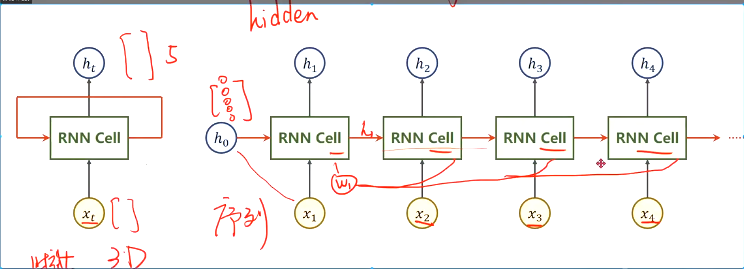

进行遍历x在X中遍历 x1进入linern得到h1 再将x2进入linern得到h2。。。是一个循环的过程 所以叫做循环神经网络

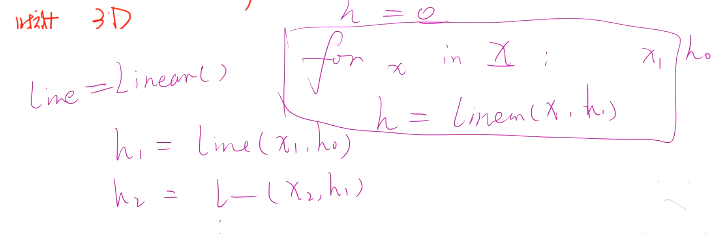

RNN的流程

RNN cell的本质就是全连接层，只不过它的输入来自两个部分，一个部分是上次运行结果的输出，另一个部分是本次的输入数据

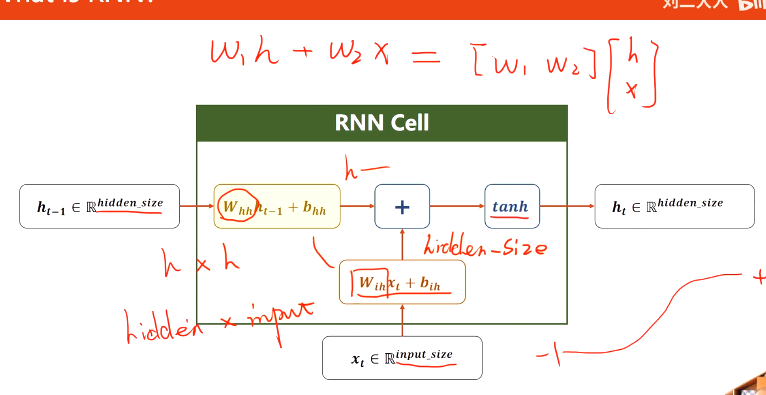
创建一个RNNcell再自己进行循环
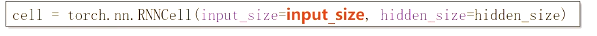 #需要确定输入的维度 和输出的维度
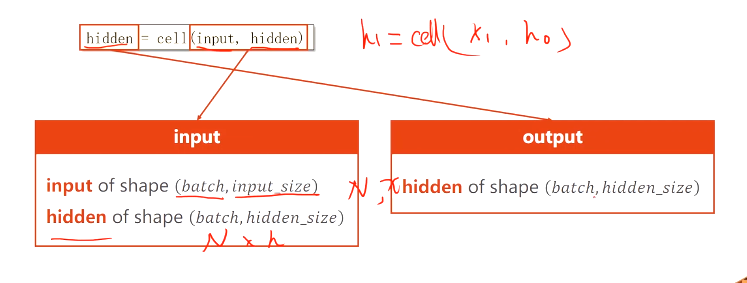

In [1]:
import torch

In [2]:
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2

datasets = torch.randn(seq_len,batch_size,input_size)

hidden = torch.zeros(batch_size,hidden_size)

cell = torch.nn.RNNCell(input_size=input_size,hidden_size=hidden_size)

#进行一个RNN，而不是一个RNNcell
for idx,input in enumerate(datasets):
    print('*' * 20, idx)
    print('input_size:', input.shape)
    hidden = cell(input, hidden)
    print('input的权重形状')
    print(cell.weight_ih.shape)
    print('input的偏置形状')
    print(cell.bias_ih.shape)
    print('outputs size:', hidden.shape)
    print('hidden的权重形状')
    print(cell.weight_hh.shape)
    print('hidden的偏置形状')
    print(cell.bias_hh.shape)
    print(hidden)

******************** 0
input_size: torch.Size([1, 4])
input的权重形状
torch.Size([2, 4])
input的偏置形状
torch.Size([2])
outputs size: torch.Size([1, 2])
hidden的权重形状
torch.Size([2, 2])
hidden的偏置形状
torch.Size([2])
tensor([[ 0.1943, -0.7345]], grad_fn=<TanhBackward0>)
******************** 1
input_size: torch.Size([1, 4])
input的权重形状
torch.Size([2, 4])
input的偏置形状
torch.Size([2])
outputs size: torch.Size([1, 2])
hidden的权重形状
torch.Size([2, 2])
hidden的偏置形状
torch.Size([2])
tensor([[ 0.2439, -0.6669]], grad_fn=<TanhBackward0>)
******************** 2
input_size: torch.Size([1, 4])
input的权重形状
torch.Size([2, 4])
input的偏置形状
torch.Size([2])
outputs size: torch.Size([1, 2])
hidden的权重形状
torch.Size([2, 2])
hidden的偏置形状
torch.Size([2])
tensor([[ 0.3333, -0.7116]], grad_fn=<TanhBackward0>)


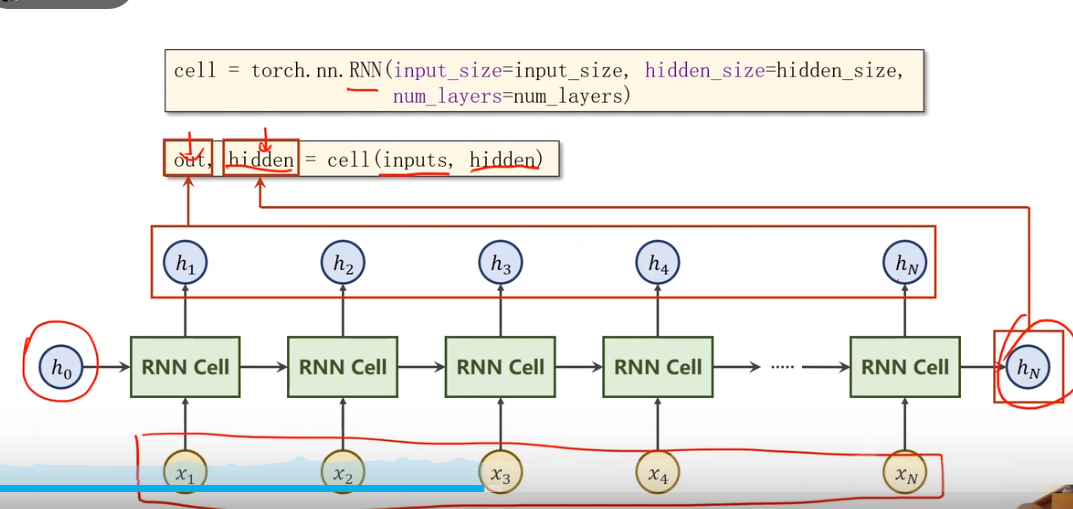

RNN的运算流程
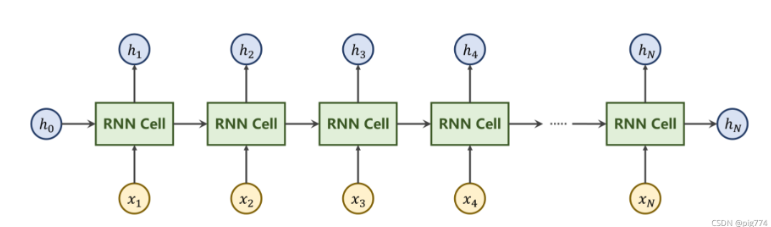
在使用torch.nn.RNN可以一次性执行多个RNNcell操作 但参数会比之前多个num_layers参数

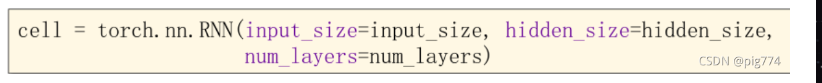

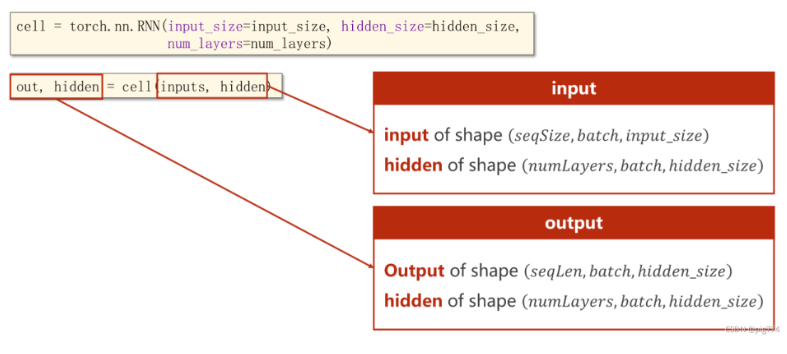

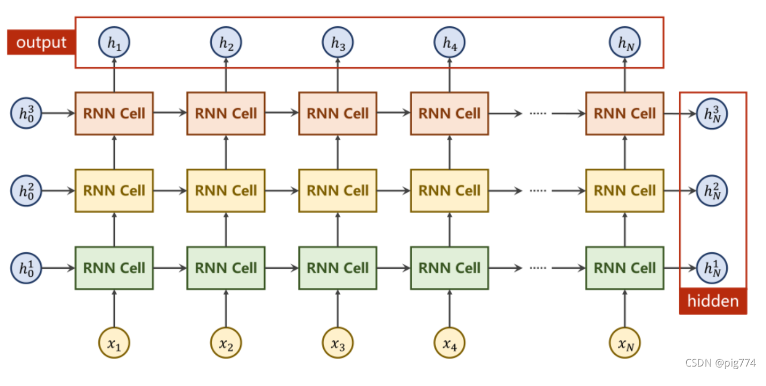

In [8]:
#hidden是再作为下一次的输入数据的，output就是该次序列的预测的输出结果
import torch
batch_size = 1
seq_len = 3
input_size = 4
hidden_size = 2
num_layers = 1
 
datasets = torch.randn(seq_len, batch_size, input_size)
hidden = torch.zeros(num_layers, batch_size, hidden_size)
# 生成RNN层
cell = torch.nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)
 
# 执行
out, hidden = cell(datasets, hidden)
print('out size:', out.shape) # [3,1,2]
print('out:', out)
print('hidden size:', hidden.shape)  # [1,1,2]
print('hidden', hidden)

out size: torch.Size([3, 1, 2])
out: tensor([[[-0.6820,  0.7875]],

        [[-0.1050,  0.8982]],

        [[-0.6345,  0.8127]]], grad_fn=<StackBackward0>)
hidden size: torch.Size([1, 1, 2])
hidden tensor([[[-0.6345,  0.8127]]], grad_fn=<StackBackward0>)


# 一个小例子 将hello-》ohlol 序列到序列

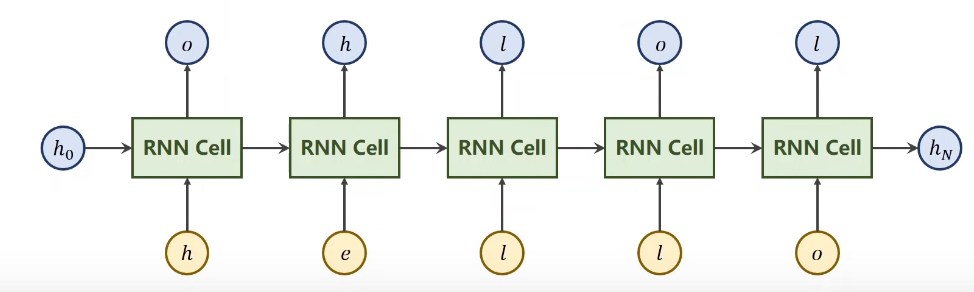
 
先将数据进行向量化 根据字符构造词典 给每个词分配一个索引 

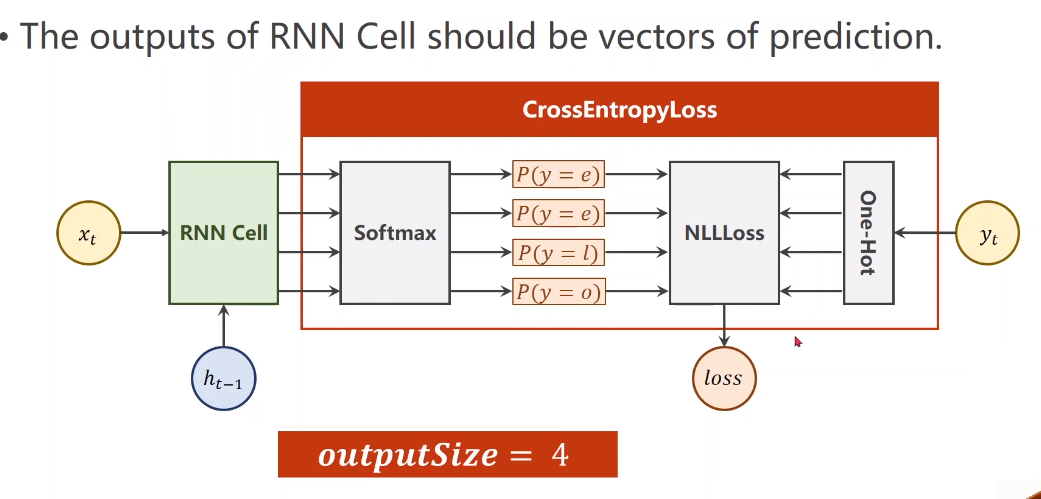

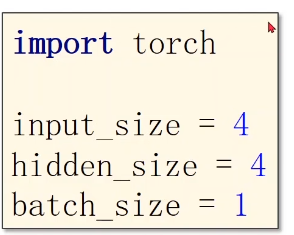
batch_size = 1即只有一个样本

In [33]:
import torch
 
input_size = 4
hidden_size = 4
batch_size = 1
 
# 构造数据集
idx2char = ['e', 'h', 'l', 'o']
x_data = [1, 0, 2, 2, 3]  # hello
y_data = [3, 1, 2, 3, 2]  # ohlol
 
# 将x_data转变为向量
one_hot_lookup = [[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]]
x_one_hot = [one_hot_lookup[x] for x in x_data]
 
inputs = torch.Tensor(x_one_hot).view(-1, batch_size, input_size)
# 这里要是LongTensor
labels = torch.LongTensor(y_data).view(-1, 1)  # reshape the labels (seqlen,1)
 
 
# 实现模型类
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size):
        super(Model, self).__init__()
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
 
        self.rnncell = torch.nn.RNNCell(input_size=self.input_size,
                                        hidden_size=self.hidden_size)
 
    def forward(self, input, hidden):
        hidden = self.rnncell(input, hidden)
        return hidden
 
    def init_hidden(self):
        return torch.zeros(self.batch_size, self.hidden_size)
 
 
net = Model(input_size, hidden_size, batch_size)
 
# 构造损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
 
# 训练
loss_list = []
for epoch in range(20):
    loss = 0
    optimizer.zero_grad()
    # 每次开始训练前，都要将h0初始化
    hidden = net.init_hidden()
    for input, label in zip(inputs, labels):
        hidden = net(input, hidden)
        loss += criterion(hidden, label)
        # 取出最大值
        _, idx = hidden.max(dim=1)
        print(idx2char[idx.item()], end='')
    print(' ', end='')
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    print(f'epoch={epoch+1},loss={loss.item()}')

lllll epoch=1,loss=7.943340301513672
lllll epoch=2,loss=6.607723236083984
lllol epoch=3,loss=5.627509117126465
oolol epoch=4,loss=4.900824069976807
ohlol epoch=5,loss=4.298019886016846
ohlol epoch=6,loss=3.8555359840393066
ohlol epoch=7,loss=3.4935805797576904
ohlol epoch=8,loss=3.186258316040039
ohlol epoch=9,loss=2.9633638858795166
ohlol epoch=10,loss=2.8181259632110596
ohlol epoch=11,loss=2.7022652626037598
ohlol epoch=12,loss=2.59035587310791
ohlol epoch=13,loss=2.48298978805542
ohlol epoch=14,loss=2.3852806091308594
ohlol epoch=15,loss=2.2961392402648926
ohlol epoch=16,loss=2.2086403369903564
ohlol epoch=17,loss=2.1185851097106934
ohlol epoch=18,loss=2.039147138595581
ohlol epoch=19,loss=2.003357172012329
ohlol epoch=20,loss=1.99409019947052


In [34]:
#用RNN建立模型来实现 hello-》ohlol
import torch
 
input_size = 4
hidden_size = 4
batch_size = 1
 
# 构造数据集
idx2char = ['e', 'h', 'l', 'o']
x_data = [1, 0, 2, 2, 3]  # hello
y_data = [3, 1, 2, 3, 2]  # ohlol
 
# 将x_data转变为向量
one_hot_lookup = [[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]]
x_one_hot = [one_hot_lookup[x] for x in x_data]
 
inputs = torch.Tensor(x_one_hot).view(-1, batch_size, input_size)

labels = torch.LongTensor(y_data)

# 实现模型类
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, batch_size, num_layers=1):
        super(Model, self).__init__()
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.input_size = input_size
        self.hidden_size = hidden_size
 
        self.rnn = torch.nn.RNN(input_size=self.input_size,
                                hidden_size=self.hidden_size,
                                num_layers=num_layers)
 
    def forward(self, input):
        hidden = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        out, _ = self.rnn(input, hidden)
        return out.view(-1, hidden_size)
 
 
net = Model(input_size, hidden_size, batch_size, num_layers=1)
 
# 构造损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
 
# 训练
loss_list = []
for epoch in range(20):
    optimizer.zero_grad() #设定优化器为0
    output = net(inputs) #输出进入模型
    loss = criterion(output, labels)#算损失
    loss.backward() #反向传播
    optimizer.step() #更新权重
    loss_list.append(loss.item())
    _, idx = output.max(dim=1)
    idx = idx.data.numpy()
    print('predicted:', ''.join([idx2char[x] for x in idx]), end='  ')
    print(f'epoch={epoch + 1},loss={loss.item()}')

predicted: lhhhh  epoch=1,loss=1.6270358562469482
predicted: lhloh  epoch=2,loss=1.37575364112854
predicted: lhloh  epoch=3,loss=1.1773178577423096
predicted: lhlol  epoch=4,loss=1.0379607677459717
predicted: lhlll  epoch=5,loss=0.9430639147758484
predicted: lhlll  epoch=6,loss=0.869986891746521
predicted: ohlll  epoch=7,loss=0.8189067840576172
predicted: ohlll  epoch=8,loss=0.7764889597892761
predicted: ohlll  epoch=9,loss=0.7374938726425171
predicted: ohlll  epoch=10,loss=0.7049654722213745
predicted: ohlol  epoch=11,loss=0.6758513450622559
predicted: ohlol  epoch=12,loss=0.6491185426712036
predicted: ohlol  epoch=13,loss=0.6210295557975769
predicted: ohlol  epoch=14,loss=0.5897308588027954
predicted: ohlol  epoch=15,loss=0.5580888986587524
predicted: ohlol  epoch=16,loss=0.5311251878738403
predicted: ohlol  epoch=17,loss=0.5097119808197021
predicted: ohlol  epoch=18,loss=0.49002695083618164
predicted: ohlol  epoch=19,loss=0.4716950058937073
predicted: ohlol  epoch=20,loss=0.45509013